# **Curso de Inteligencia Artificial**

Universidad Austral de Chile, año 2023.

Tema: Bayes Ingenuo

Fuente: https://www.aprendemachinelearning.com/comprar-casa-o-alquilar-naive-bayes-usando-python/

Adaptación, apuntes adicionales a Notebook: Luis Vidal (lvidal@uach.cl)



# **Video Apoyo Bayes**

Cómo escapar de la trampa bayesiana

[Vídeo en Youtube](https://www.youtube.com/watch?v=D7KKlC0LOyw&ab_channel=Veritasiumenespa%C3%B1ol)

# **Librerias Requeridas**

In [ ]:
#Carga de Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

# **Carga de Datos**

In [ ]:
# Ustilizando pandas, se carga archivo en memoria como dataframe
df = pd.read_csv("diabetes.csv")
df.head(10)

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
5,5,116,74,0,0,25.6,0.201,30,tested_negative
6,3,78,50,32,88,31.0,0.248,26,tested_positive
7,10,115,0,0,0,35.3,0.134,29,tested_negative
8,2,197,70,45,543,30.5,0.158,53,tested_positive
9,8,125,96,0,0,0.0,0.232,54,tested_positive


# **Datos**



Las columnas que tenemos son:

* 1. Número de embarazos
* 2. Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia a la glucosa oral
* 3. Presión arterial diastólica (mm Hg)
* 4. Espesor del pliegue cutáneo del tríceps (mm)
* 5. Insulina sérica de 2 horas (mu U / ml)
* 6. Índice de masa corporal (peso en kg / (altura en m) ^ 2)
* 7. Función del pedigrí de la diabetes
* 8. Edad (años)
* 9. Variable de clase (0 o 1) de testeo negativo o testeo pesitivo


**Algunos supuestos para el problema formulado:**

No se tiene en consideración las nacionalidades de las personas, ni su sexo.

Con esta información, queremos que el algoritmo aprenda y que como resultado podamos consultar nueva información y nos dé una decisión sobre si el testeo es positivo o negativo.

# **Teorema de Bayes**

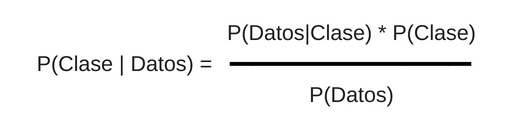




**Clase** es una salida en particular, por ejemplo “comprar”

**Datos** son nuestras características, en nuestro caso la glucosa, presión arterial, embarazos, etc

**P(Clase|Datos)** se llama posterior (y es el resultado que queremos hallar)

**P(Datos|Clase)** se llama “verosimilitud” (en inglés likelihood)

**P(Clase)** se llama anterior (pues es una probabilidad que ya tenemos)

**P(Datos)** se llama probabilidad marginal

Si estamos tratando de elegir entre dos clases como en nuestro caso “positivo” ó “negativo”, entonces una manera de tomar la decisión es calcular la tasa de probabilidades a posterior:

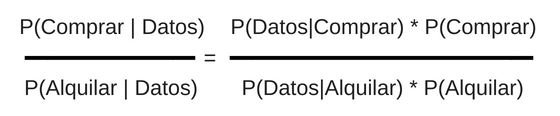

con esta maniobra, nos deshacemos del denominador de la ecuación anterior P(Datos) el llamado “probabilidad marginal”.

# **Clasificador Gaussian Naive Bayes**

Uno de los tipos de clasificadores más populares es el llamado en inglés Gaussian Naive Bayes Classifier. NOTA:Hay otros clasificadores Bayesianos que no veremos en este artículo. Veamos cómo es su fórmula para comprender este curioso nombre: aplicaremos 2 clases (comprar, alquilar) y tres características: ingresos, ahorros e hijos.

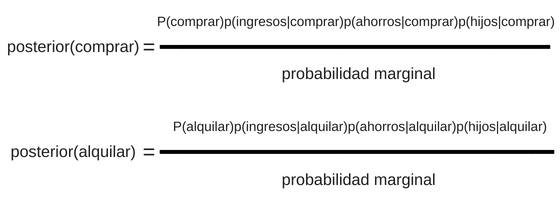

Posterior de comprar es lo que queremos hallar:** P(positivo|datos).**

De esta forma:

* **P(positivo)** es la probabilidad que ya tenemos. Es sencillamente el número de veces que se selecciona comprar =1 en nuestro conjunto de datos, dividido el total de observaciones. En nuestro caso (luego lo veremos en Python) son 67/202

* **p(glucosa|positivo)p(negativo|positivo)p(insulina|positivo)** es la verosimilitud. Los nombres Gaussian y Naive (ingenuo) del algoritmo vienen de dos suposiciones:
1. asumimos que las características de la verosimilitud no estan correlacionada entre ellas. Esto seria que la glucosa sean independientes a la insulina y al negativo. Como no es siempre cierto y es una suposición ingenua es que aparece en el nombre “naive bayes”
2. asumimos que el valor de las características (glucosa, insulina, etc) tendrá una distribución normal (gaussiana). Esto nos permite calcular cada parte p(glucosa|positivo) usando la función de probabilidad de densidad normal.

* **Probabilidad marginal** muchas veces es difícil de calcular, sin embargo, por la ecuación que vimos más arriba, no la necesitaremos para obtener nuestro valor a posterior. Esto simplifica los cálculos.

# **Visualización de Datos**

Veamos qué cantidad de muestras de positivo o negativo tenemos:

In [ ]:
print(df.groupby('class').size())

class
tested_negative    500
tested_positive    268
dtype: int64


Esto son 268 entradas en las que se sale positivo y 500 en las que no.

Veamos un histograma

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5349752d10>,
      dtype=object)

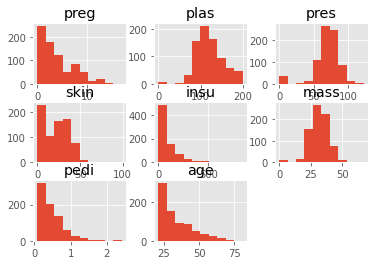

In [ ]:
df.hist()

Hagamos un histograma de las características quitando la columna de resultados (positivo):

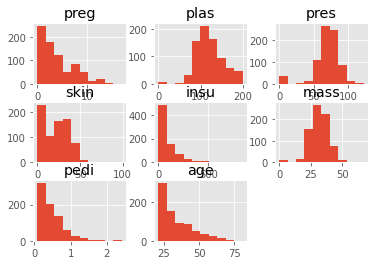

In [ ]:
df.drop(['class'], axis=1).hist()
plt.show()

¿ A grandes rasgos que distrribuciones de datos "se parecen" un poco a una distribución normal ?.

# **Preparar los datos de entrada**

Y ahora veamos un resumen estadístico que nos brinda la librería Pandas con describe():

In [ ]:
df.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


# Feature Selection ó Selección de **Características**

En este ejercicio haremos Feature Selection para mejorar nuestros resultados con este algoritmo. En vez de utilizar las 9 columnas de datos de entrada que tenemos, vamos a utilizar una Clase de SkLearn llamada SelectKBest con la que seleccionaremos las 5 mejores características y usaremos sólo esas.

In [ ]:
X=df.drop(['class'], axis=1)
y=df['class']

#Selección de las 5 mejores características
best=SelectKBest(k=5)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['preg', 'plas', 'mass', 'pedi', 'age'], dtype='object')


Bien, entonces usaremos 5 de las 9 características que teníamos. Las que “más aportan” al momento de clasificar. Veamos qué grado de correlación tienen:

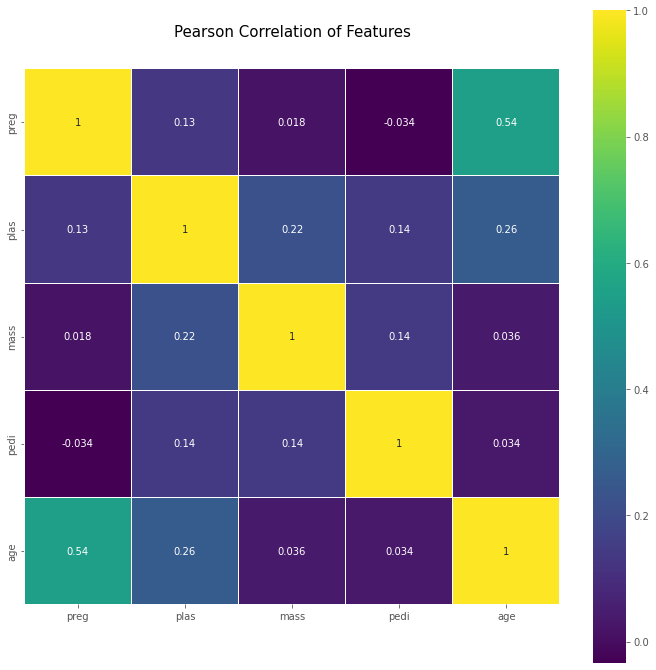

In [ ]:
used_features =X.columns[selected]

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(df[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Con esto comprobamos que en general están poco correlacionadas, sin embargo también tenemos 2 valores de 0,54. Esperemos que el algoritmo sea lo suficientemente “naive” para dar buenos resultados.


# **Crear el modelo Gaussian Naive Bayes con SKLearn**

Primero vamos a dividir nuestros datos de entrada en entrenamiento y test.

In [ ]:
# Split dataset in training and test datasets
X_train, X_test = train_test_split(df, test_size=0.2, random_state=6)
y_train =X_train["class"]
y_test = X_test["class"]

Y creamos el modelo, lo ponemos a aprender con fit() y obtenemos predicciones sobre nuestro conjunto de test.

In [ ]:
# Instantiate the classifier
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train[used_features].values,
    y_train
)

y_pred = gnb.predict(X_test[used_features])

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test[used_features], y_test)))

Precisión en el set de Entrenamiento: 0.76
Precisión en el set de Test: 0.79


Pues hemos obtenido un bonito 79% de aciertos en el conjunto de Test con nuestro querido clasificador bayesiano.

# **Probemos el modelo: ¿positivo o negativo?**

Ahora, hagamos 2 predicciones para probar nuestra máquina:

* En un caso será una persona de 30 años, con un nivel de glucosa de 80, masa corporal de 60.4 kg, y un pedigrí de 0.225

* El otro será una persona de 80, con un nivel de glucosa de 140, masa corporal de 80.6 kg, y un pedigrí de 0.335

* En ambos casos no se presentan embarazo

In [ ]:
print(gnb.predict([[0,        80,     60.4,       0.225,         30],
                   [0,        140,    80.6,       0.335,         80] ]))
#Resultado esperado negativo, porsitivo

['tested_negative' 'tested_positive']


In [ ]:
print(gnb.predict([[0, 80, 60.4, 0.225, 30],]))

['tested_negative']


Index(['preg', 'plas', 'mass', 'pedi', 'age'], dtype='object')

Un caso será una persona de 50 años, con un nivel de glucosa de 120, indice de masa corporal de 65.3, pedigri de 0.123, y no presenta embarazo


In [ ]:
Embarazo=float(input("Indique su embarazo: "))
Glucosa=float(input("Indique nivel de glucosa: "))
Masa=float(input("Indique su masa corporal: "))
Pedigri=float(input("Indique la funcion pedigri: "))
Edad=float(input("Indique su edad: "))

resultado = gnb.predict([[Embarazo,        Glucosa,     Masa,       Pedigri,         Edad]])

print("---------------")

if (resultado[0]==0):
  print("Usted saldria negativo para diabetes")
else:
  print("Usted saldria negativo para diabetes")

Indique su embarazo: 0
Indique nivel de glucosa: 120
Indique su masa corporal: 65.3
Indique la funcion pedigri: 0.123
Indique su edad: 50
---------------
Usted saldria negativo para diabetes
